 ---
 layout: wide_default
 ---  

# Summary Section

This project examines how sentiment exhibited in 10-K filings affects stock returns. Data used is 2022 S&P 500 data, ML and LM sentiment dictionaries, and chosen word lists about natural disasters, politics, and time off from work. Sentiment was shown to not significantly affect returns, while positive and negative sentiment about politics and natural disasters showed larger correlations with returns. 

# Data Section

## Data

This project used data from S&P500 firms, including 2022 10-K filings and returns over a period after those filings. The main dataframe used is viewable in outputs/sample_analysis.csv. 

## Variables

The returns on the day of the 10-K filing and each of the next ten days were gathered from the crsp raw data file in github. These returns were used to create the variables 'Ret on Filing Date', 'Cumulative Ret (Filing Date + 2 days)', and 'Cumulative Ret (Filing Date + 10 days)'. Since returns are displayed as percentages, a formula is needed to calculate cumulative return:

$
\text{Cumulative Return}_T = \prod_{t=1}^T (1 + r_t) - 1
$

This was calculated for 3 and ten day periods to be examined with the sentiment variables. 

The sentiment variables are broken into two categories: Sentiment for the entire 10-K, and sentiment of the three word lists examined. The former comprises four variables and uses both the LM and ML (referred to as BHR)  dictionaries. The latter uses only the ML (BHR) dictionaries. So the 10 sentiment variables are as follows:

   'Positive BHR Ratio', 'Negative BHR Ratio',
    'Positive LM Ratio', 'Negative LM Ratio',
    'Positive ND BHR', 'Negative ND BHR',
    'Positive TimeOff', 'Negative TimeOff',
    'Positive Politics', 'Negative Politics'
    
Each of these variables is calculated as a ratio of 'hits,' or appearances of the desired condition, over the total number of words in the 10k. The first four variables used the two dictionaries to estimate the positive and negative sentiment of the 10-K. The last six variables used near_regex to see if any of the words from the three word lists appeared close to any positive or negative words from the ML dictionary. 





In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

with open('inputs/ML_negative_unigram.txt', 'r') as file:
    BHR_negative = [line.strip().lower() for line in file]

BHR_negative.sort()


with open('inputs/ML_positive_unigram.txt', 'r') as file:
    BHR_positive = [line.strip().lower() for line in file]

len(BHR_negative), len(BHR_positive)
BHR_positive.sort()

file_path = "inputs/LM_MasterDictionary_1993-2021.csv"  
df = pd.read_csv(file_path)
LM_positive = df[df['Positive'] > 0]['Word'].tolist()
LM_positive = [e.lower() for e in LM_positive] 
df.describe() 
len(LM_positive)

LM_negative = df[df['Negative'] > 0]['Word'].tolist()
LM_negative = [e.lower() for e in LM_negative]


print(f"There are {len(BHR_positive)} words in the ML positive dictionary")
print(f"There are {len(BHR_negative)} words in the ML negative dictionary")
print(f"There are {len(LM_positive)} words in the LM positive dictionary")
print(f"There are {len(LM_negative)} words in the LM negative dictionary")

There are 75 words in the ML positive dictionary
There are 94 words in the ML negative dictionary
There are 347 words in the LM positive dictionary
There are 2345 words in the LM negative dictionary


The near_finder function was used with the max distance between words set to 10. This was to avoid spacing too far apart which could lead to false hits.

The three topics chosen to explore were natural disasters, time off from work, and politics. Natural disasters was chosen to see whether weather and nature had any affect on the largest companies in the United States. This can be extended to surmise that if natural disasters do not affect these firms negatively, then they have little monetary reason to care or acknowledge global climate change. Time off from work was chosen to examine whether companies that view work live balance and time off positively are assosciated with better or worse returns. Politics were chosen to see how litigation affects returns in the mid-term year of 2022. 

Notably in the ML dictionary, positive sentiment showed a negative correlation with returns, while negative sentiment had a positive one. Perhaps, companies doing poorly try to hide this with many positive words in their filings. In the LM dictionary, both positive and negative sentiment had a negative correlation with returns. Note than these correlations were extremely small.

Politics and natural disasters showed much higher correlations than other variables. However, both positive and negative sentiment had positive correlation with returns. This means that firms that discussed these topics, in whatever sentiment, exhibited higher returns over the next ten days. 




# Results

The ML sentiment variables on the filing date both had positive correlations with returns. However, each of the LM sentiment variables had negative correlations with returns. This holds true for the next return variable also. The positive ML sentiment variable correlation decreases with time, while the negative ML sentiment variable correlation increases with time. The ten days correlation results are discussed above. 

The results do not agree with Table 3.This is likely due to the relatively small sample of the S&P500 compared to the extensive firms analyzed in the paper. The year 2022 is also too small of a time frame to examine when looking at sentiment compared to returns, especially due to how easily false hits can happen or the state of the market at that time can influence returns. 

Natural disasters and politics correlations are >.2, which can be considered different enough from zero to investigate. Since both positive and negative sentiment of natural disasters was correlated with greater returns, it can be assumed that natural disasters are associated with greater returns of S&P 500 companies. Since both positive and negative sentiment of politics was correlated with greater returns, it can be assumed that political change most often benefits large companies rather than hurts them. Perhaps this is a result of large corporations lobbying for litigation that benefits their product or service. 

Sign and magnitude changes are discussed above. The magnitude changes from day of to 3 days to 10 days in the LM dictionary indicates that the sentiment mattered . Its larger list of words may be why it makes more sense than the ML correlation results. 

In [2]:
data_file = 'output/analysis_sample.csv'
data = pd.read_csv(data_file)

return_vars = ['Ret on Filing Date', 'Cumulative Ret (Filing Date + 2 days)', 'Cumulative Ret (Filing Date + 10 days)']
sentiment_vars = [
    'Positive BHR Ratio', 'Negative BHR Ratio',
    'Positive LM Ratio', 'Negative LM Ratio',
    'Positive ND BHR', 'Negative ND BHR',
    'Positive TimeOff', 'Negative TimeOff',
    'Positive Politics', 'Negative Politics'
]

subset = data[sentiment_vars + return_vars].dropna()
correlation_table = pd.DataFrame(index=sentiment_vars, columns=return_vars)

for sentiment in sentiment_vars:
    for ret in return_vars:
        correlation_table.loc[sentiment, ret] = subset[sentiment].corr(subset[ret])

correlation_table = correlation_table.reset_index().rename(columns={"index": "Sentiment Variable"})
correlation_table

,Sentiment Variable,Ret on Filing Date,Cumulative Ret (Filing Date + 2 days),Cumulative Ret (Filing Date + 10 days)
0,Positive BHR Ratio,0.026061,0.001823,-0.019082
1,Negative BHR Ratio,0.042557,0.052289,0.059791
2,Positive LM Ratio,-0.0906,-0.047228,-0.034457
3,Negative LM Ratio,-0.012629,-0.047179,-0.102915
4,Positive ND BHR,-0.004281,0.053554,0.22269
5,Negative ND BHR,0.019205,0.053583,0.226401
6,Positive TimeOff,-0.070178,0.043077,0.022383
7,Negative TimeOff,-0.054594,0.046662,0.044878
8,Positive Politics,-0.012304,0.054881,0.201372
9,Negative Politics,-0.03199,0.069737,0.200223


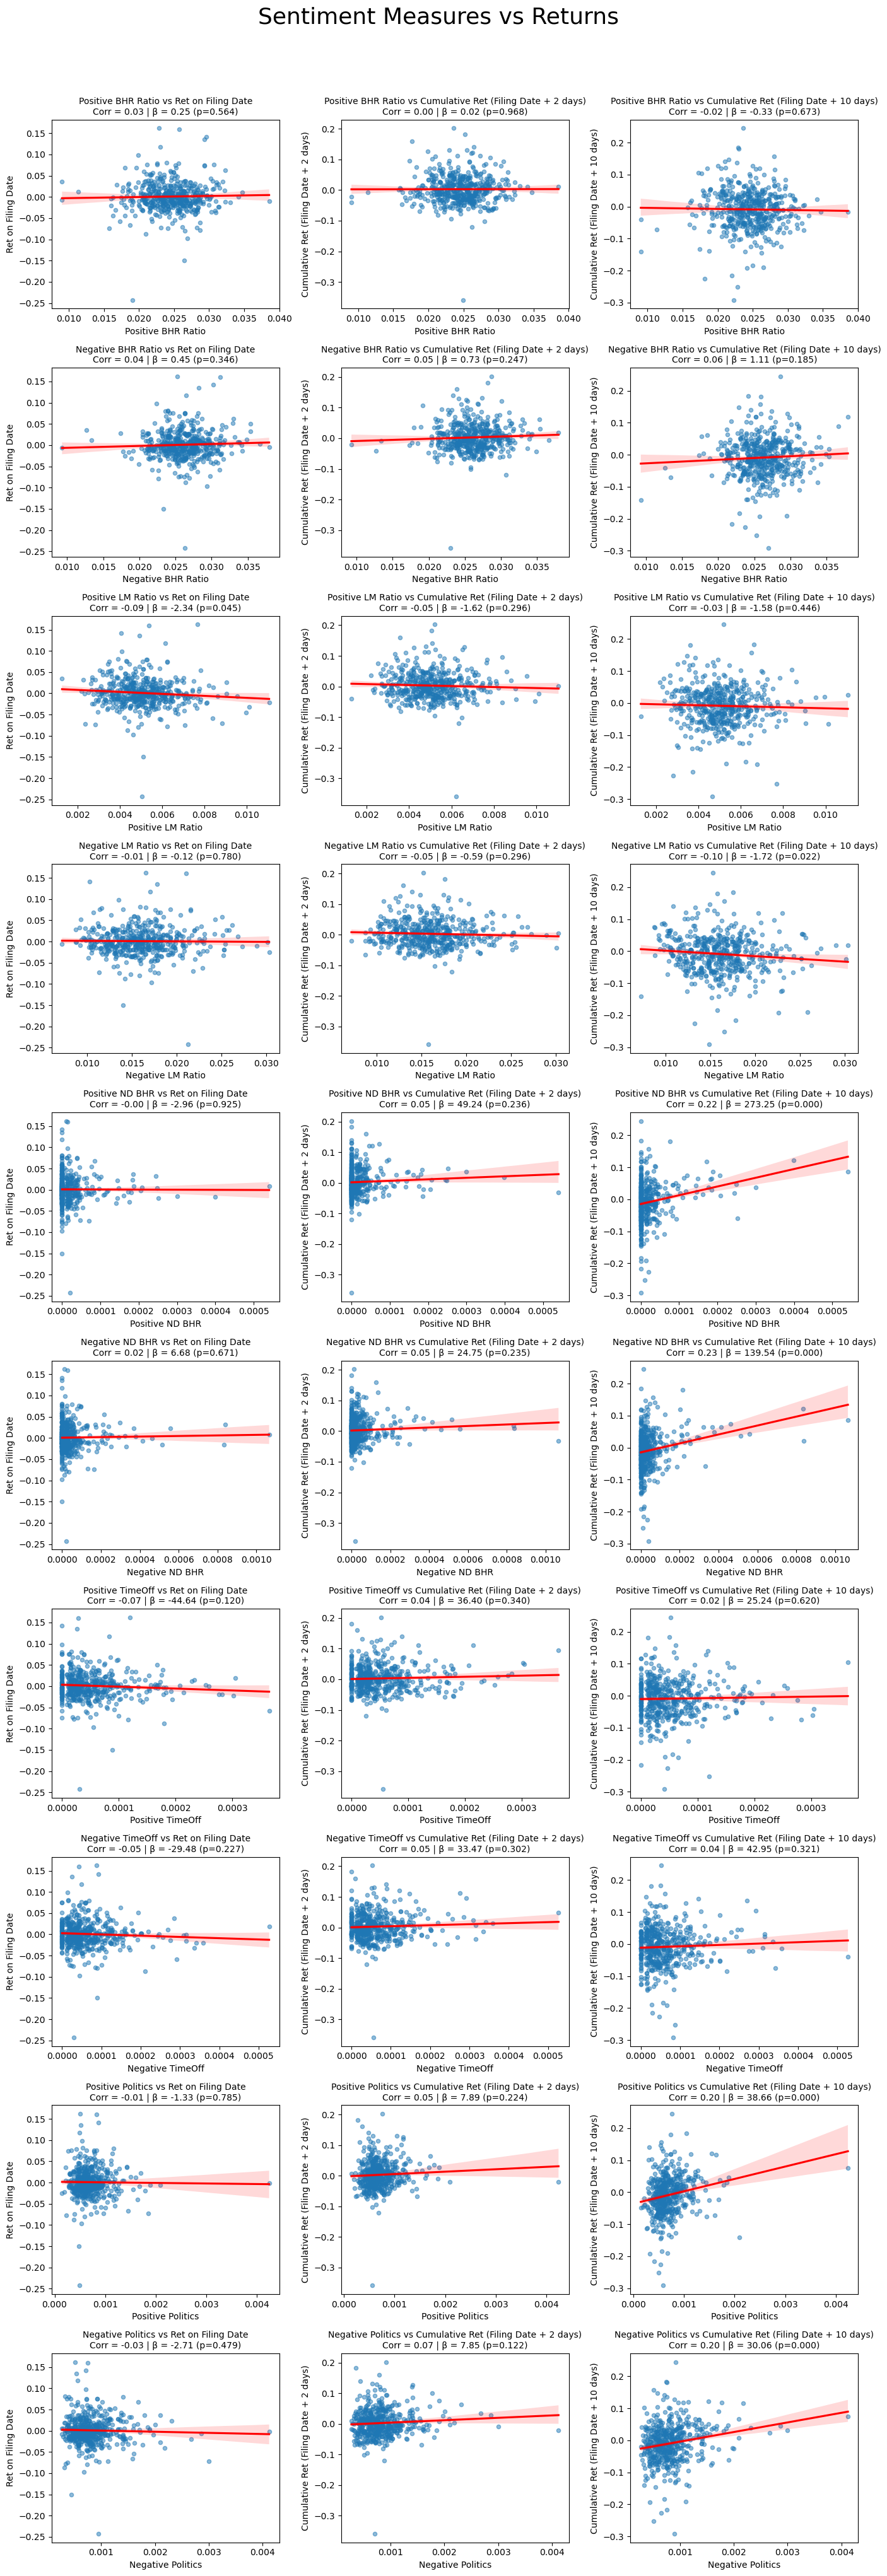

In [3]:
fig, axes = plt.subplots(nrows=len(sentiment_vars), ncols=len(return_vars), figsize=(14, 4 * len(sentiment_vars)))


if len(return_vars) == 1:
    axes = axes.reshape(-1, 1)
elif len(sentiment_vars) == 1:
    axes = axes.reshape(1, -1)


for i, sentiment in enumerate(sentiment_vars):
    for j, ret in enumerate(return_vars):
        ax = axes[i, j]
        

        sns.regplot(
            x=subset[sentiment],
            y=subset[ret],
            ax=ax,
            scatter_kws={'s': 20, 'alpha': 0.5},
            line_kws={'color': 'red'}
        )
        
        corr = subset[sentiment].corr(subset[ret])

        X = subset[[sentiment]].copy()
        X = sm.add_constant(X)
        y = subset[ret]
        model = sm.OLS(y, X).fit()
        coef = model.params[sentiment]
        pval = model.pvalues[sentiment]

        ax.set_title(f"{sentiment} vs {ret}\nCorr = {corr:.2f} | β = {coef:.2f} (p={pval:.3f})", fontsize=10)
        ax.set_xlabel(sentiment)
        ax.set_ylabel(ret)

plt.suptitle("Sentiment Measures vs Returns", fontsize=26, y=1.02)
plt.tight_layout()
plt.show()

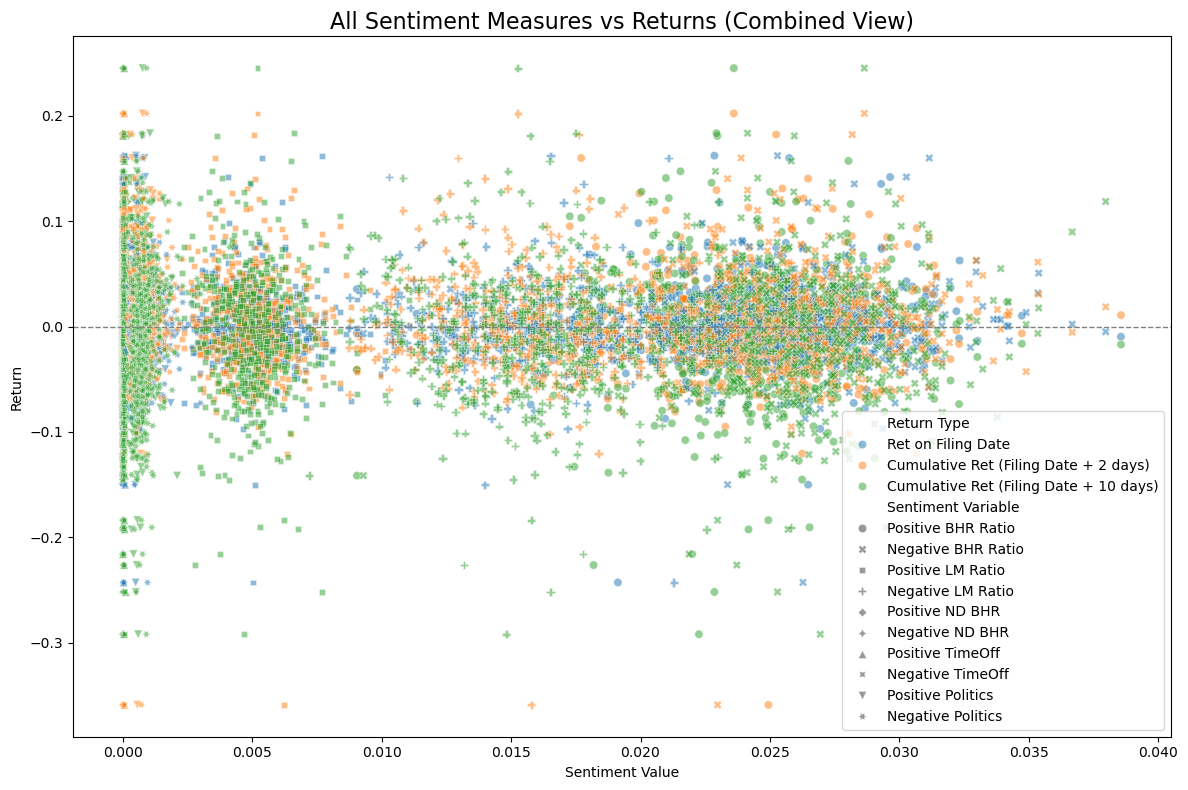

In [4]:
long_df = subset.melt(
    id_vars=sentiment_vars,
    value_vars=return_vars,
    var_name='Return Type',
    value_name='Return'
)

sentiment_stacked = []
for sentiment in sentiment_vars:
    temp = long_df[[sentiment, 'Return Type', 'Return']].copy()
    temp = temp.rename(columns={sentiment: 'Sentiment Value'})
    temp['Sentiment Variable'] = sentiment
    sentiment_stacked.append(temp)

plot_df = pd.concat(sentiment_stacked)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_df,
    x='Sentiment Value',
    y='Return',
    hue='Return Type',
    style='Sentiment Variable',
    alpha=0.5
)

plt.title("All Sentiment Measures vs Returns (Combined View)", fontsize=16)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.tight_layout()
plt.show()